<h1 align="center"> Plots </h1>

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

from tournament_simulations.data_structures import Matches
from turning_point.normal_coefficient import TurningPoint
from turning_point.variance_stats import ExpandingVarStats
from turning_point.permutation_coefficient import PermutationTurningPoint, TurningPointComparison
from turning_point.match_coefficient import MatchTurningPoint

from config import path

In [2]:
import logging
from logs import turning_logger

turning_logger.setLevel(logging.INFO)

In [3]:
SPORTS = ("basketball", "handball", "soccer", "volleyball")

path.PLOT_PATH.mkdir(parents=True, exist_ok=True)

<h2> Dataset </h2>

In [4]:
sport_to_matches = {
    sport: Matches(pd.read_csv(path.MATCHES_PATH / f"{sport}.csv"))
    for sport in SPORTS
}

In [5]:
expected = pd.DataFrame(
        pd.DataFrame(
            {
                ("id", ""): pd.Categorical(["1", "2"]),
                ("turning point", "normal"): [20, 35],
                ("turning point", "mean"): [10, 20],
                ("turning point", "std"): [1, 1],
                ("turning point", "2.5%"): [1, 2],
                ("turning point", "50%"): [11, 21],
                ("turning point", "97.5%"): [20, 35],
                ("turning point", "minimizer"): [1, 1],
                ("turning point", "maximizer"): [10, 20],
                ("%turning point", "normal"): [0.35, 0.89],
                ("%turning point", "mean"): [0.5, 0.6],
                ("%turning point", "std"): [0.1, 0.15],
                ("%turning point", "2.5%"): [0.05, 0.12],
                ("%turning point", "50%"): [0.52, 0.61],
                ("%turning point", "97.5%"): [0.85, 0.97],
                ("%turning point", "minimizer"): [0.5, 0.6],
                ("%turning point", "maximizer"): [0.1, 0.15],
            }
        ).set_index("id")
    )
expected

turning point                                             %turning point  \
          normal mean std 2.5% 50% 97.5% minimizer maximizer         normal   
id                                                                            
1             20   10   1    1  11    20         1        10           0.35   
2             35   20   1    2  21    35         1        20           0.89   

                                                     
   mean   std  2.5%   50% 97.5% minimizer maximizer  
id                                                   
1   0.5  0.10  0.05  0.52  0.85       0.5      0.10  
2   0.6  0.15  0.12  0.61  0.97       0.6      0.15

In [6]:
sport_to_var_stats = {
    sport: ExpandingVarStats(pd.read_csv(path.VARIANCE_STATS_PATH / f"{sport}.csv"))
    for sport in SPORTS
}

sport_to_tp = {
    sport: TurningPoint(pd.read_csv(path.TURNING_POINT_PATH / f"{sport}.csv"))
    for sport in SPORTS
}

sport_to_mtp = {
    sport: MatchTurningPoint.from_matches_and_turning_point(sport_to_matches[sport], sport_to_tp[sport])
    for sport in sport_to_tp
}

In [7]:
sport_to_permuted_var_stats = {
    sport: ExpandingVarStats(pd.read_csv(path.PERMUTED_VARIANCE_STATS_PATH / f"{sport}.csv"))
    for sport in SPORTS
}

sport_to_permuted_tp = {
    sport: PermutationTurningPoint(pd.read_csv(path.PERMUTED_TURNING_POINT_PATH / f"{sport}.csv"))
    for sport in SPORTS
}


In [8]:
sport_to_optimal_var_stats = {
    sport: ExpandingVarStats(pd.read_csv(path.OPTIMAL_VARIANCE_STATS_PATH / f"{sport}.csv"))
    for sport in SPORTS
}

sport_to_optimal_tp = {
    sport: PermutationTurningPoint(pd.read_csv(path.OPTIMAL_TURNING_POINT_PATH / f"{sport}.csv"))
    for sport in SPORTS
}

In [9]:
import warnings

PERCENTILES = [2.5, 25, 50, 75, 97.5]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sport_to_tp_comparison = {
        sport: TurningPointComparison(
            sport_to_tp[sport], 
            sport_to_permuted_tp[sport],
            sport_to_optimal_tp[sport],
        ).comparison(PERCENTILES)
        for sport in sport_to_tp
    }

<h2> Style </h2>

In [10]:
import data_analysis.plots.utils.customization

<h2> Temporal Progression </h2>

In [11]:
FIGSIZE = (18,13)
NUM_COLS = 2
NUM_ROWS = 2
TOURNEY_NAMES_AND_IDS = (
    ("NBA (Basketball)", "nba@/basketball/usa/nba-2019-2020/"),
    ("Superleague (Volleyball)", "superleague@/volleyball/russia/superleague-2019-2020/"),
    ("La Liga (Soccer)", "laliga@/soccer/spain/laliga-2019-2020/"),
    ("Herre Handbold Ligaen (Handball)", "herre-handbold-ligaen@/handball/denmark/herre-handbold-ligaen-2019-2020/"),
)

<h3> Variances </h3>

In [12]:
from data_analysis.plots.variances_temporal_progression import plot_variances_temporal_progression

LAST_DATE = 60

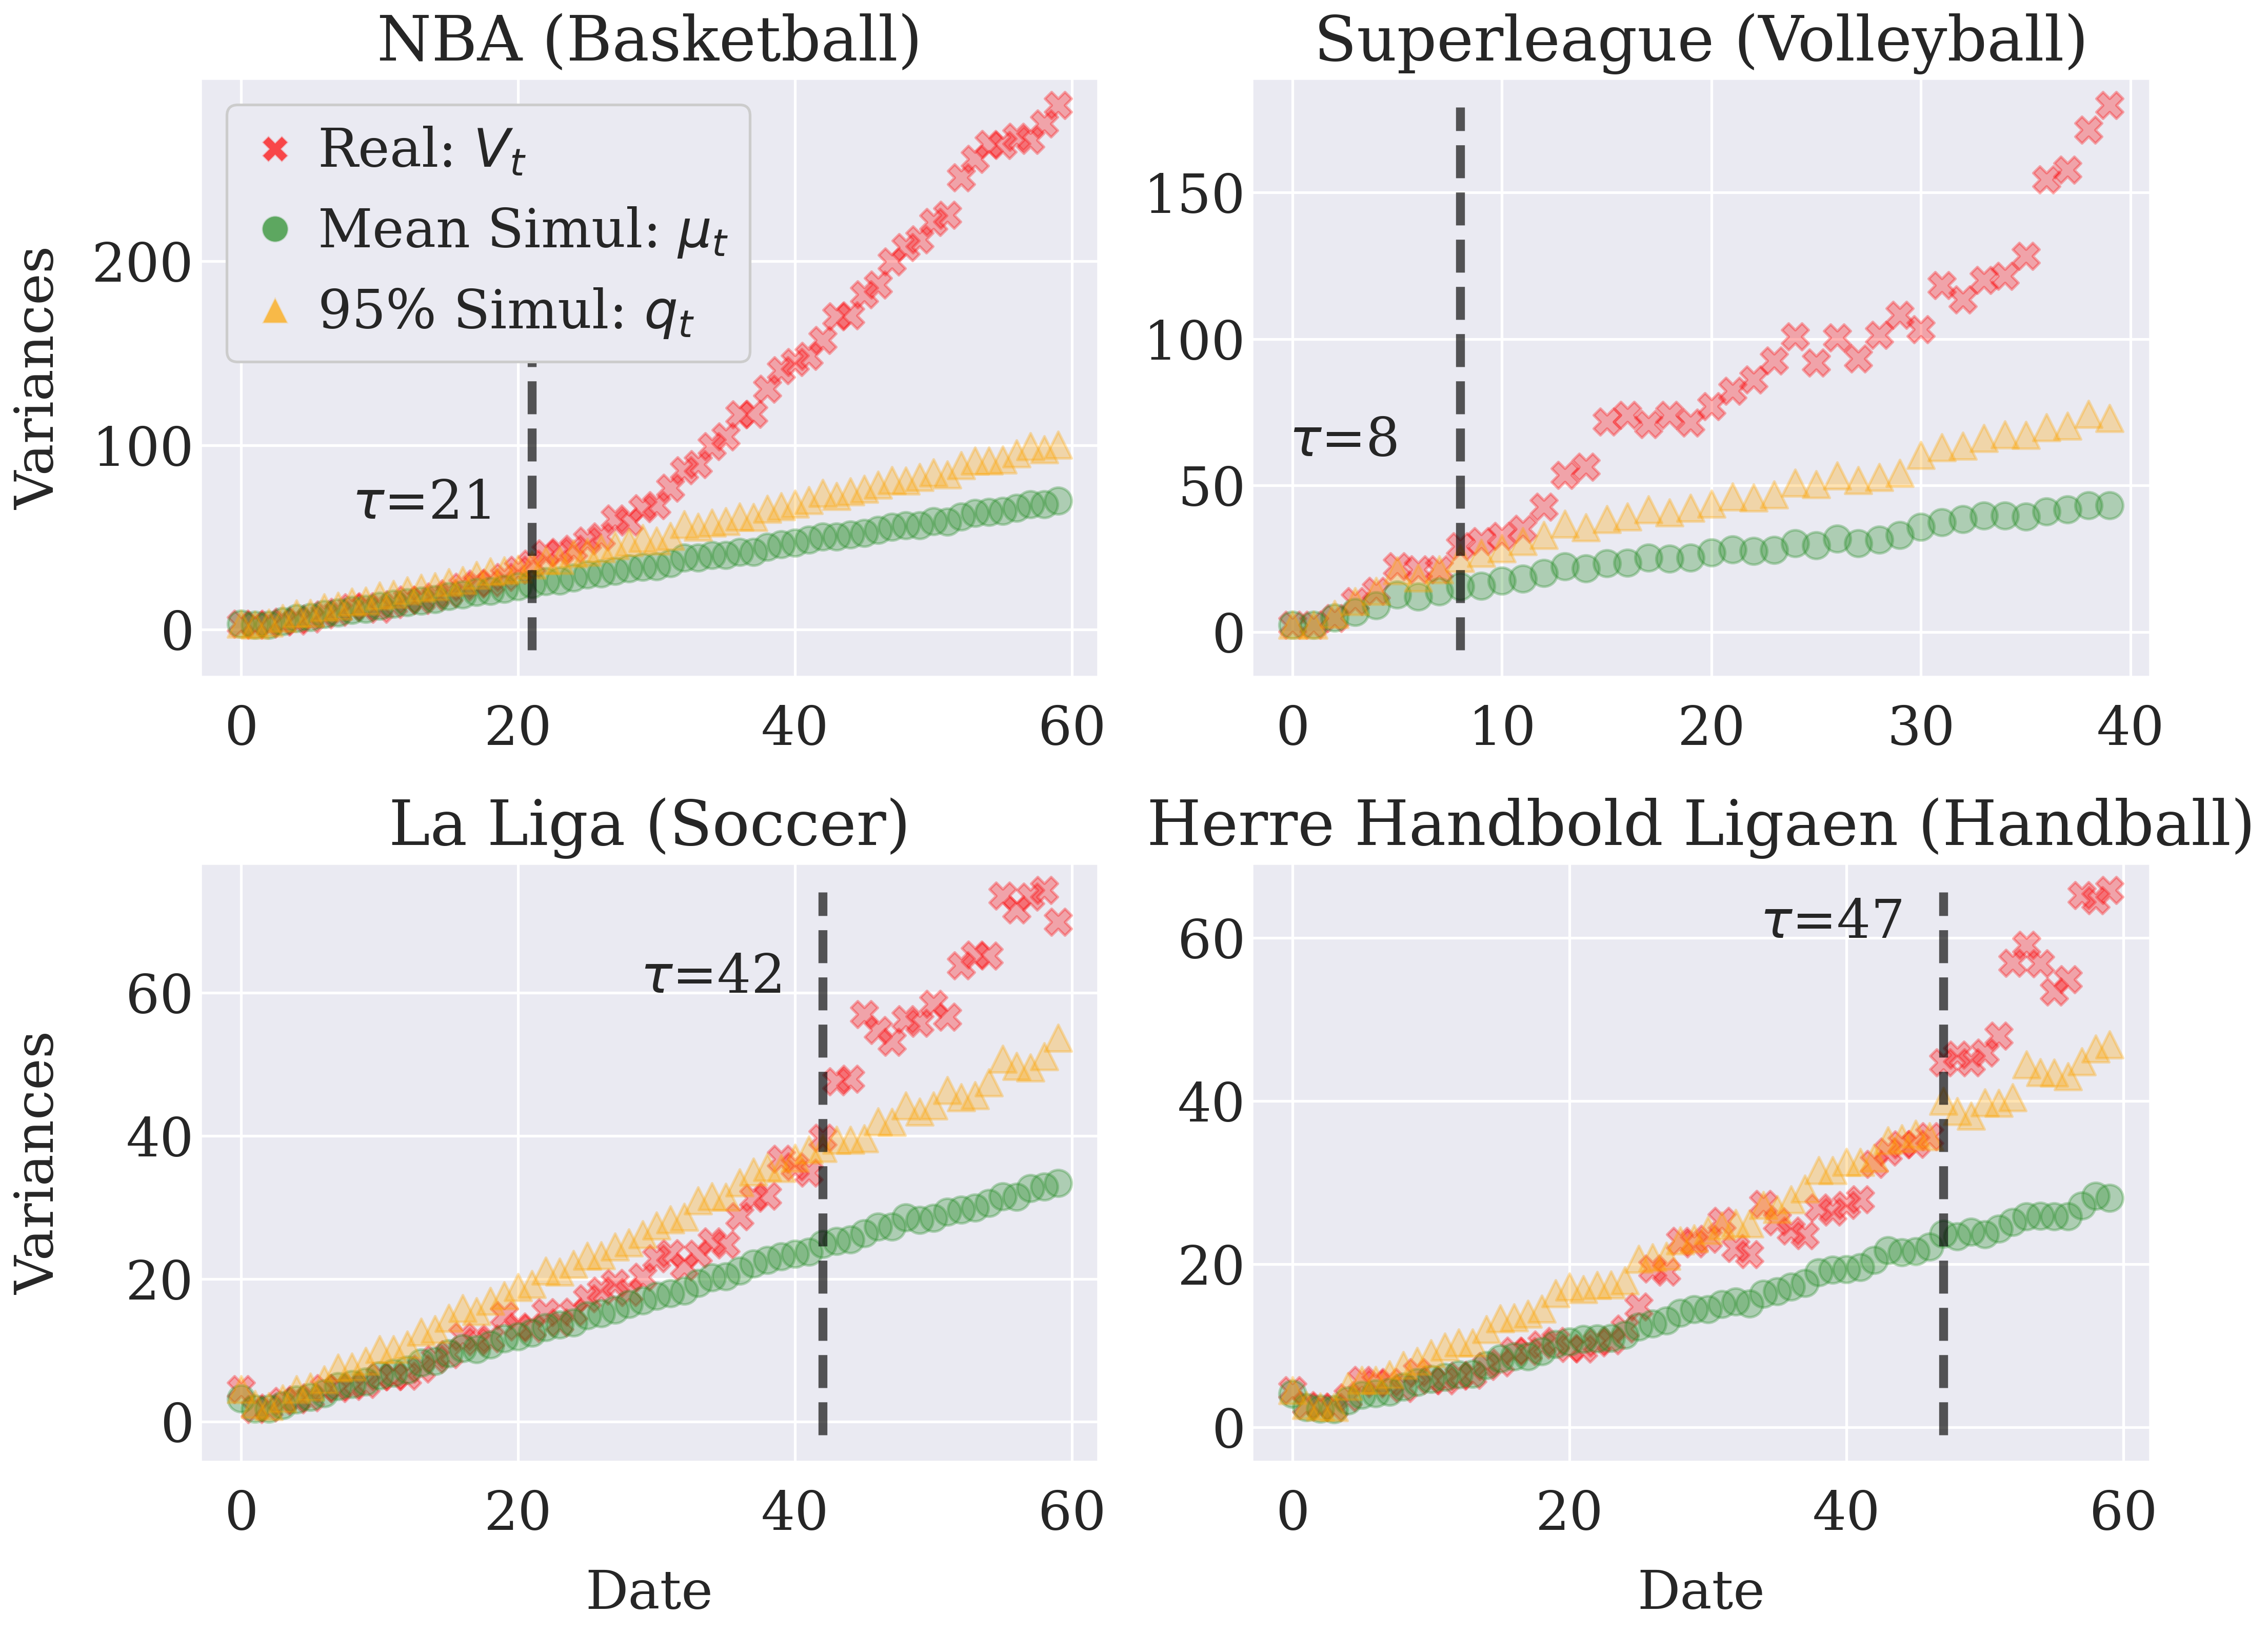

In [13]:
%matplotlib inline

plot_variances_temporal_progression(
    sport_to_tp, sport_to_var_stats, NUM_ROWS, NUM_COLS, FIGSIZE, TOURNEY_NAMES_AND_IDS, LAST_DATE
)

plt.savefig(path.PLOT_PATH / "turning_point_progression.pdf")

<h2> Statistical Data </h2>

<h3> Boxplot Turning Point </h3>

In [14]:
from data_analysis.plots.turning_point_boxplot import plot_boxplot_turning_points

MTP_TP_COLUMNS = ("match turning point", "%turning point")

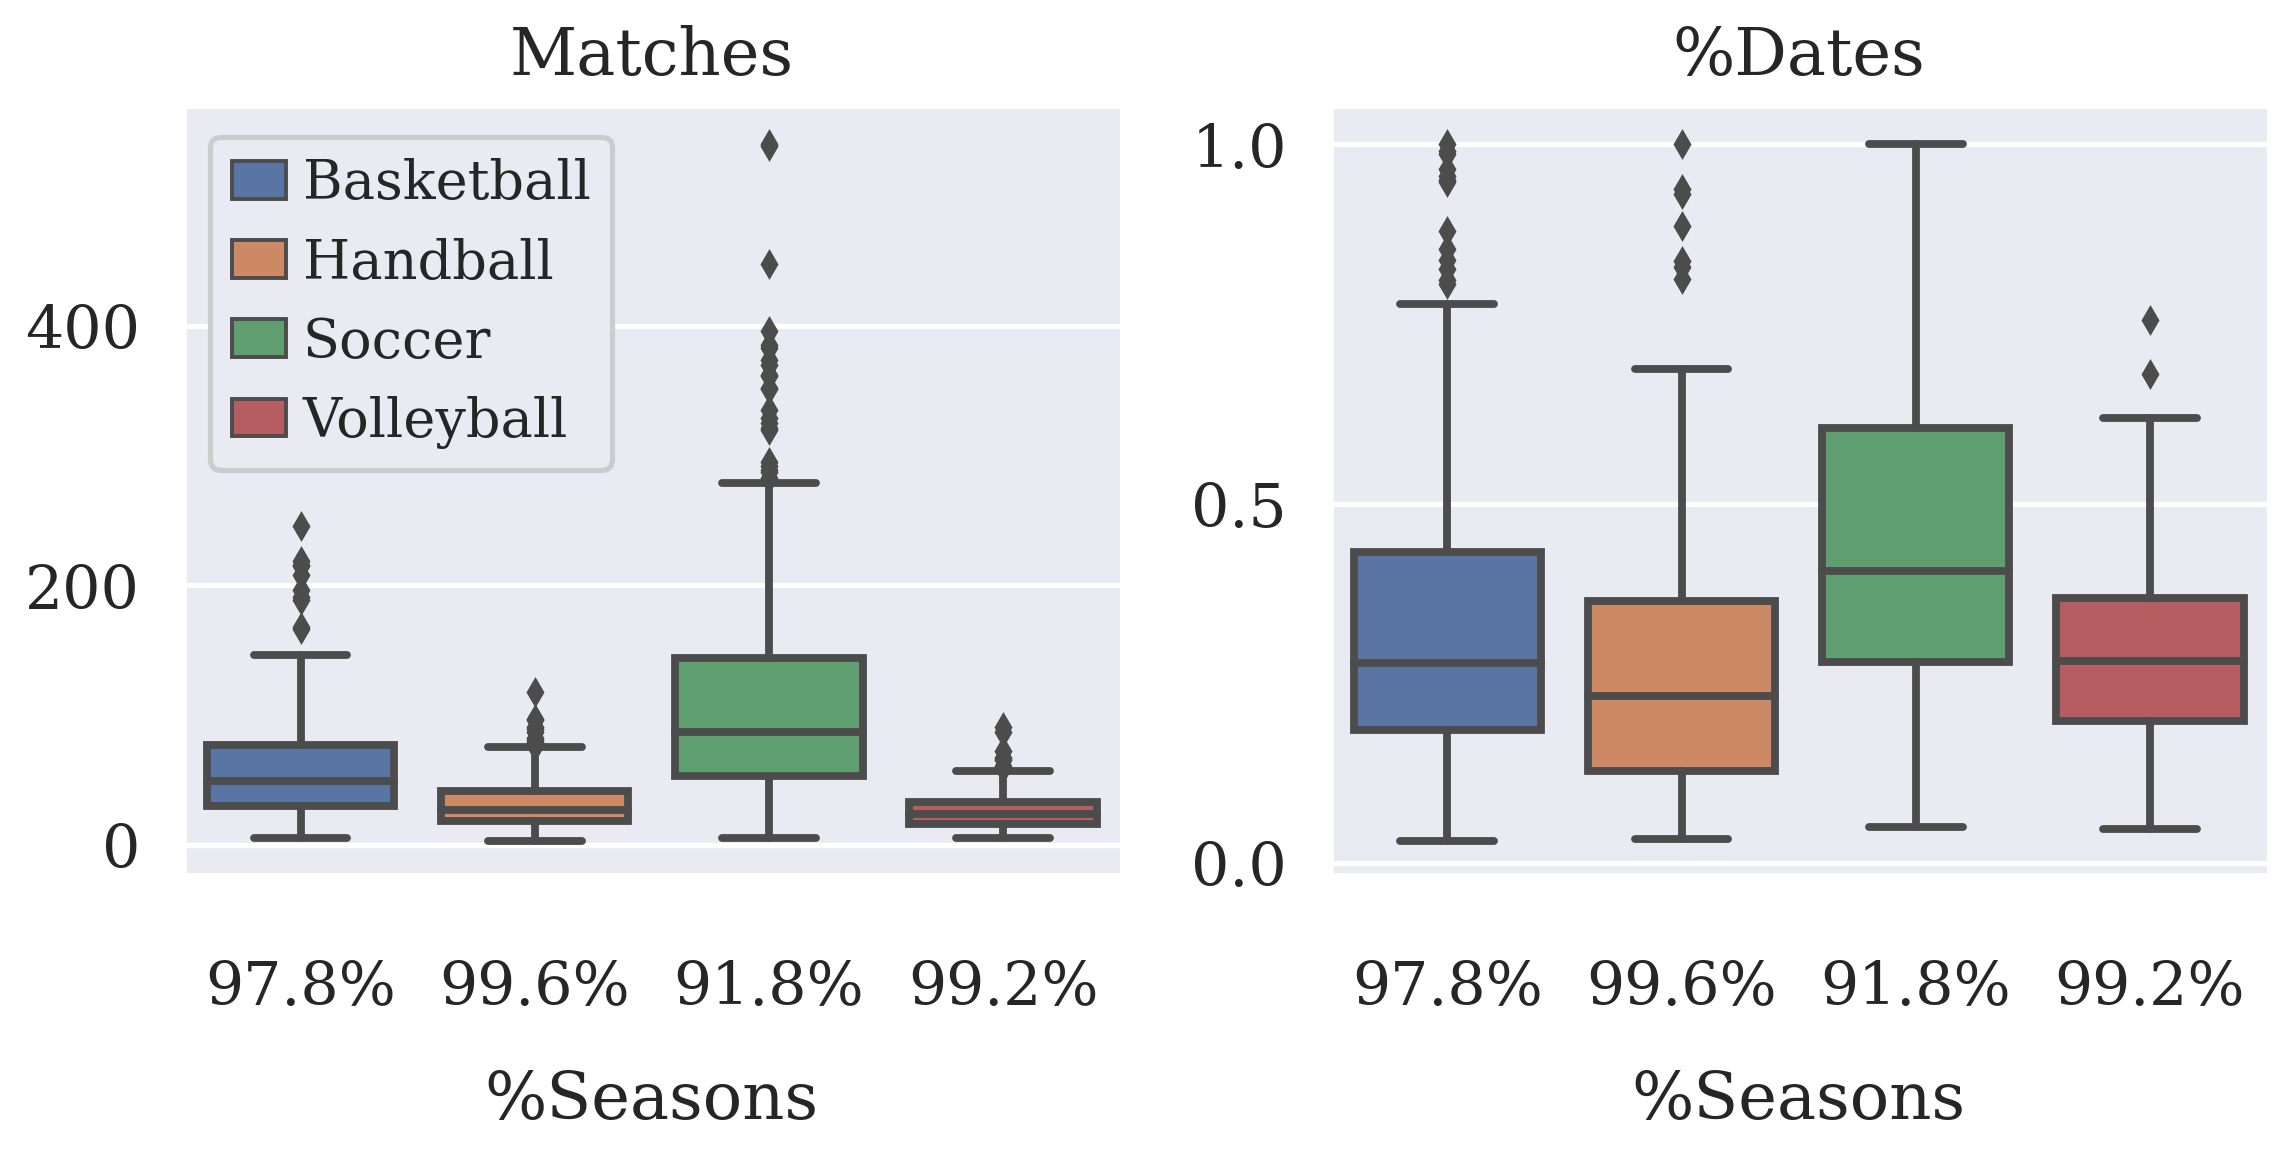

In [15]:
%matplotlib inline

plot_boxplot_turning_points(sport_to_tp, sport_to_mtp, MTP_TP_COLUMNS)

plt.savefig(path.PLOT_PATH / "turning_point_boxplot.pdf")

<h3> Boxplot Comparison </h3>

In [16]:
from data_analysis.plots.comparison_boxplot import plot_comparison_boxplot

COLUMN = "%turning point"

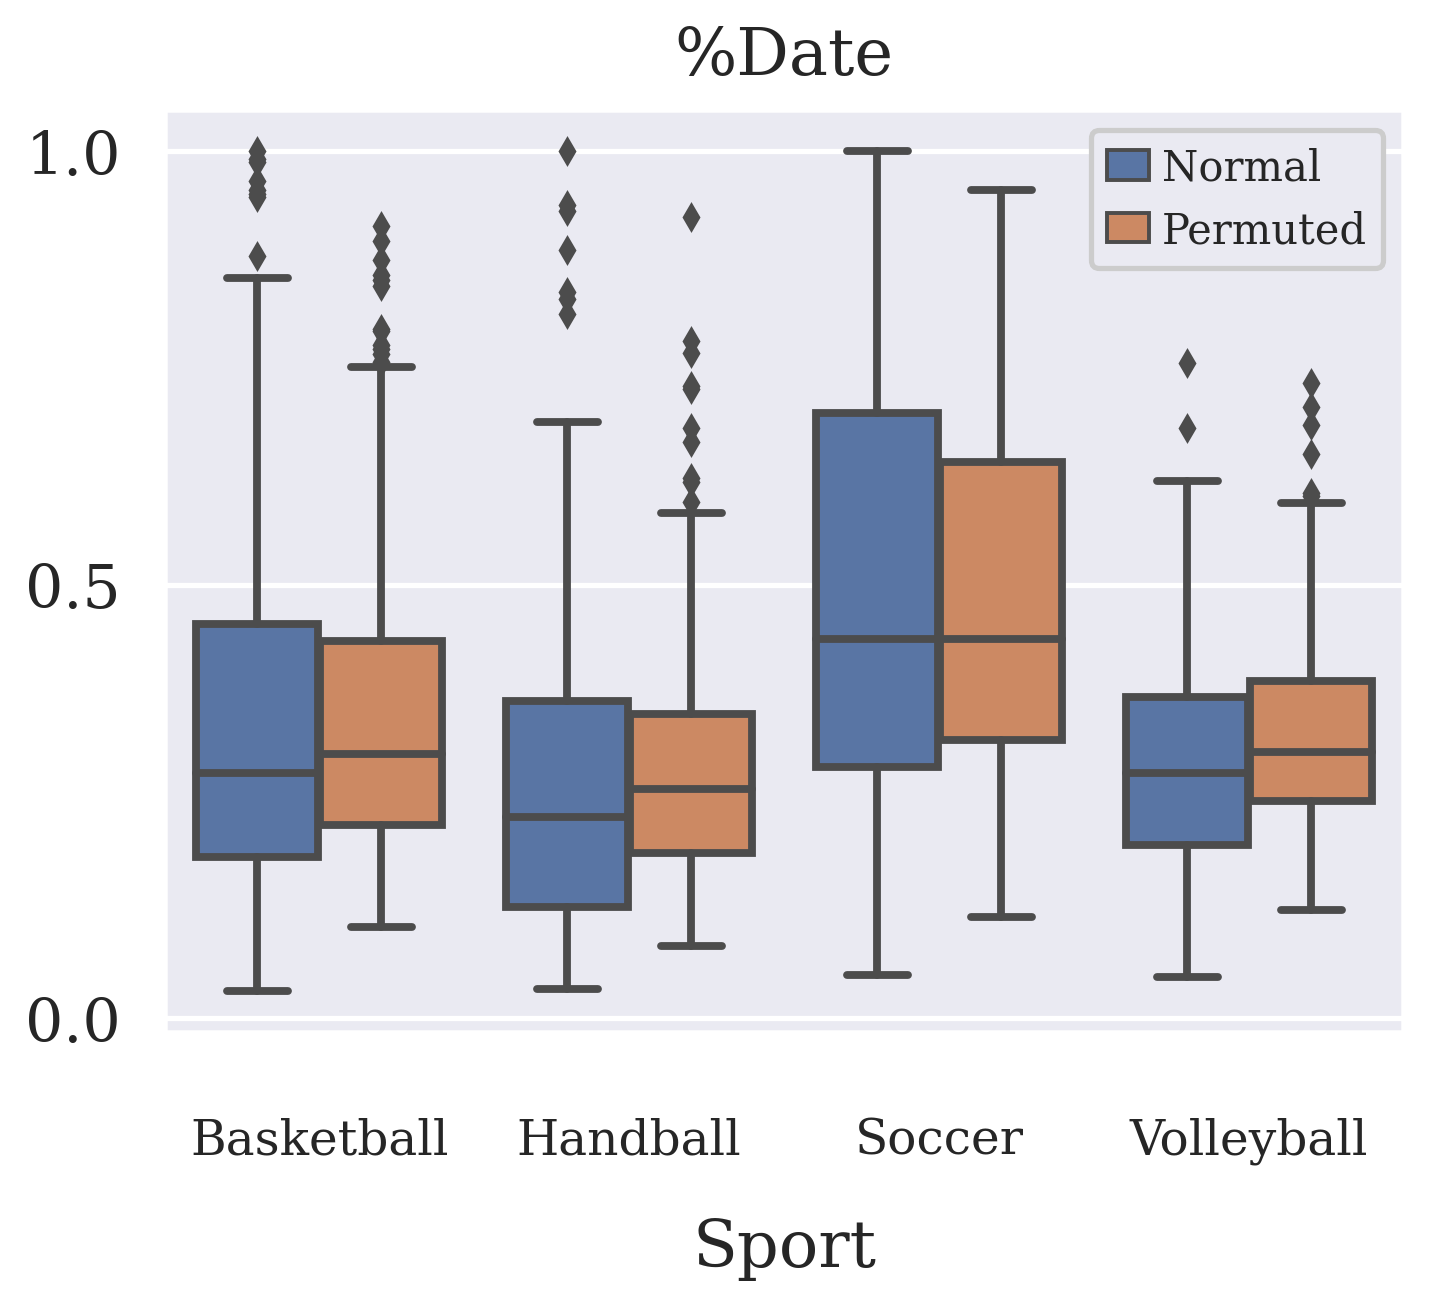

In [17]:
%matplotlib inline

plot_comparison_boxplot(sport_to_tp_comparison, COLUMN)

plt.savefig(path.PLOT_PATH / "turning_point_comparison_boxplot.pdf")

<h3> Scatter Comparison </h3>

In [18]:
from data_analysis.plots.comparison_scatter import plot_comparison_scatter

FIGSIZE = (18,13)
NUM_COLS = 2
NUM_ROWS = 2
COLUMN = "%turning point"

In [19]:
%matplotlib inline

plot_comparison_scatter(
    sport_to_tp_comparison, NUM_ROWS, NUM_COLS, FIGSIZE, COLUMN
)

plt.savefig(path.PLOT_PATH / "turning_point_comparison_scatter.pdf")

<h3> No Turning Points </h3>

In [20]:
pd.set_option('display.max_rows', 100)

all_sports_no_tp: list[pd.DataFrame] = []

for sport, comparison in sport_to_tp_comparison.items():
    
    with pd.option_context('mode.use_inf_as_na', True):
        index_infinity = comparison["%turning point"].isna().any(axis="columns")

    no_tp = comparison[index_infinity].copy()
    no_tp["sport"] = sport
    all_sports_no_tp.append(no_tp.reset_index())

pd.concat(all_sports_no_tp).set_index(["sport", "id"]).sort_index()[["%turning point"]]

%turning point  \
                                                                      normal   
sport      id                                                                  
basketball acb@/basketball/spain/acb-2010-2011/                     0.426667   
           b-league@/basketball/japan/b-league-2016-2017/           0.128713   
           basket-league@/basketball/greece/a1-2010-2011/           0.240741   
           basketligaen@/basketball/denmark/basketligaen-2...       0.714286   
           basketligan@/basketball/sweden/basketligan-2018...       0.258427   
...                                                                      ...   
volleyball superliga@/volleyball/brazil/superliga-2010-2011/        0.196721   
           superliga@/volleyball/croatia/1-a-liga-2010-2011/        0.300000   
           superliga@/volleyball/spain/superliga-2010-2011/         0.333333   
           v-league@/volleyball/japan/v-league-2019-2020/           0.156250   
           volleyligaen@/volleyball/denmark/volleyligaen-2...       0.203704   

                                                                         \
                                                                   mean   
sport      id                                                             
basketball acb@/basketball/spain/acb-2010-2011/                0.286667   
           b-league@/basketball/japan/b-league-2016-2017/      0.175578   
           basket-league@/basketball/greece/a1-2010-2011/      0.270988   
           basketligaen@/basketball/denmark/basketligaen-2...  0.402165   
           basketligan@/basketball/sweden/basketligan-2018...  0.167041   
...                                                                 ...   
volleyball superliga@/volleyball/brazil/superliga-2010-2011/   0.222404   
           superliga@/volleyball/croatia/1-a-liga-2010-2011/   0.331111   
           superliga@/volleyball/spain/superliga-2010-2011/    0.282828   
           v-league@/volleyball/japan/v-league-2019-2020/      0.196875   
           volleyligaen@/volleyball/denmark/volleyligaen-2...  0.238272   

                                                                         \
                                                                    std   
sport      id                                                             
basketball acb@/basketball/spain/acb-2010-2011/                0.094395   
           b-league@/basketball/japan/b-league-2016-2017/      0.076778   
           basket-league@/basketball/greece/a1-2010-2011/      0.084441   
           basketligaen@/basketball/denmark/basketligaen-2...  0.143222   
           basketligan@/basketball/sweden/basketligan-2018...  0.055965   
...                                                                 ...   
volleyball superliga@/volleyball/brazil/superliga-2010-2011/   0.070305   
           superliga@/volleyball/croatia/1-a-liga-2010-2011/   0.105385   
           superliga@/volleyball/spain/superliga-2010-2011/    0.087296   
           v-league@/volleyball/japan/v-league-2019-2020/      0.055144   
           volleyligaen@/volleyball/denmark/volleyligaen-2...  0.066099   

                                                                         \
                                                                   2.5%   
sport      id                                                             
basketball acb@/basketball/spain/acb-2010-2011/                0.143000   
           b-league@/basketball/japan/b-league-2016-2017/      0.066584   
           basket-league@/basketball/greece/a1-2010-2011/      0.111111   
           basketligaen@/basketball/denmark/basketligaen-2...  0.153247   
           basketligan@/basketball/sweden/basketligan-2018...  0.086798   
...                                                                 ...   
volleyball superliga@/volleyball/brazil/superliga-2010-2011/   0.114754   
           superliga@/volleyball/croatia/1-a-liga-2010-2011/   0.157500   
           sup